In [11]:
import cv2
import numpy as np

def run_preview():
    cv2.namedWindow("preview")
    vc = cv2.VideoCapture(0)

    if vc.isOpened(): # try to get the first frame
        rval, frame = vc.read()
    else:
        rval = False

    while rval:
        cv2.imshow("preview", frame)
        rval, frame = vc.read()
        key = cv2.waitKey(20)
        if key == 27: # exit on ESC
            break
    cv2.destroyWindow("preview")

# run_preview()


In [38]:
distorted = cv2.imread('/home/moritz/Schreibtisch/kicker_fisheye.png')
distorted = cv2.cvtColor(distorted, cv2.COLOR_BGR2RGB)

npz_calib_file = np.load('calibration_data.npz')

distCoeff = npz_calib_file['distCoeff']
intrinsic_matrix = npz_calib_file['intrinsic_matrix']

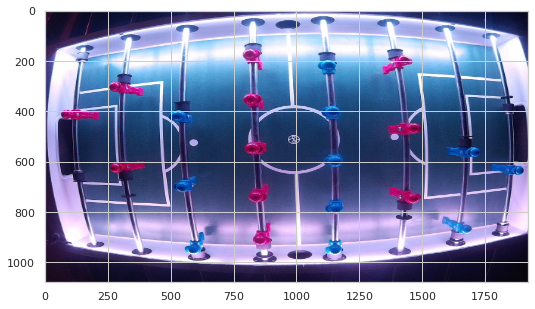

In [40]:
import matplotlib.pyplot as plt
plt.imshow(cv2.resize(distorted, (1920, 1080)))

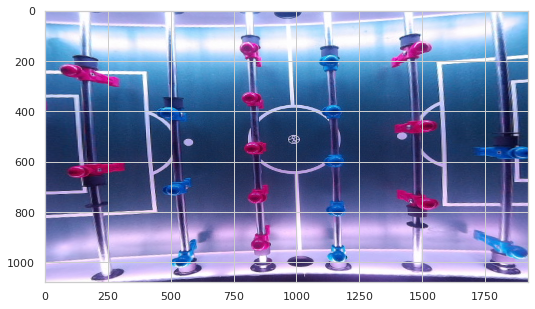

In [39]:

undistorted = cv2.undistort(cv2.resize(distorted, (1920, 1080)), intrinsic_matrix, distCoeff, None)                                         
plt.imshow(undistorted)

In [24]:
distCoeff

array([[-2.57614020e-01,  8.77086999e-02, -2.56970803e-04,
        -5.93390389e-04, -1.52194091e-02]])

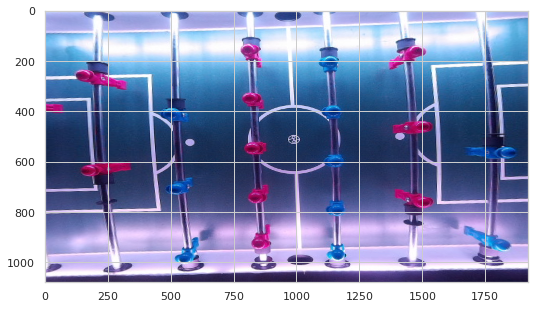

In [41]:

intrinsic_matrix[0,0] = 1000
intrinsic_matrix[1,1] = 1000
undistorted = cv2.undistort(cv2.resize(distorted, (1920, 1080)), intrinsic_matrix, distCoeff, None)                                         
plt.imshow(undistorted)

In [42]:
distCoeff

array([[-2.57614020e-01,  8.77086999e-02, -2.56970803e-04,
        -5.93390389e-04, -1.52194091e-02]])

In [50]:
cap = cv2.VideoCapture(0)
w = cap.get(cv2.CAP_PROP_FRAME_WIDTH);
h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT); 
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output2.mp4',fourcc, 15.0, (int(w),int(h)))

In [ ]:
# record video
while (cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        out.write(frame)
        cv2.imshow('Video Stream', frame)

    else:
        break

In [10]:
cap.release()
out.release()
cv2.destroyAllWindows()

NameError: name 'out' is not defined

In [35]:
# label the video by mouse dragging

param = None

def mousePosition(event,x,y,flags, passed_param):
    global param
    if event == cv2.EVENT_MOUSEMOVE:
        # print(x,y)
        param = (x,y)


# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('output.mp4')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

delay = 25

cv2.namedWindow('Frame')

cv2.setMouseCallback('Frame', mousePosition)

ball_pos = []
# Read until video is completed
while(cap.isOpened()):
    frame_pos = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret is not True:
        break

    # Display the resulting frame
    cv2.imshow('Frame',frame)

    # Press Q on keyboard to  exit
    key = cv2.waitKey(int(delay)) & 0xFF

    if key == ord('q'):
        break
    elif key == ord('n'):
        pass
    elif key == ord('j'):
        delay *= 1.5
    elif key == ord('k'):
        delay /= 1.5
    elif key == ord('h'):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_pos - 40)
        delay = 45
    
    try: 
        ball_pos[frame_pos] = param
    except IndexError:
        ball_pos.append(param)
        assert len(ball_pos) == frame_pos + 1
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

In [18]:
frame_pos

0.0

In [25]:
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

In [36]:
len(ball_pos)

623

In [37]:
ball_pos[100:200]

[(438, 149),
 (428, 179),
 (388, 220),
 (339, 264),
 (280, 289),
 (224, 290),
 (196, 290),
 (166, 279),
 (136, 257),
 (123, 240),
 (116, 224),
 (113, 206),
 (113, 192),
 (113, 177),
 (113, 175),
 (113, 174),
 (113, 174),
 (113, 173),
 (110, 167),
 (103, 154),
 (98, 146),
 (95, 143),
 (95, 142),
 (95, 142),
 (95, 142),
 (95, 147),
 (95, 149),
 (95, 151),
 (95, 151),
 (95, 151),
 (95, 151),
 (95, 152),
 (95, 153),
 (95, 157),
 (95, 160),
 (95, 162),
 (96, 165),
 (98, 168),
 (98, 169),
 (99, 173),
 (100, 175),
 (101, 178),
 (102, 181),
 (103, 184),
 (103, 186),
 (105, 191),
 (108, 197),
 (109, 200),
 (109, 201),
 (109, 204),
 (110, 206),
 (110, 210),
 (110, 216),
 (111, 220),
 (112, 221),
 (112, 222),
 (113, 223),
 (113, 224),
 (114, 228),
 (114, 231),
 (114, 234),
 (115, 236),
 (115, 238),
 (115, 242),
 (115, 245),
 (115, 248),
 (115, 249),
 (116, 250),
 (116, 250),
 (116, 250),
 (117, 252),
 (118, 253),
 (120, 254),
 (123, 254),
 (129, 254),
 (135, 247),
 (141, 241),
 (146, 234),
 (150,

In [38]:
pd

<module 'pandas' from '/usr/lib/python3.8/site-packages/pandas/__init__.py'>

In [39]:
pd.DataFrame(ball_pos)

,0
0,None
1,None
2,None
3,None
4,None
...,...
618,"(260, 209)"
619,"(260, 209)"
620,"(260, 209)"
621,"(260, 209)"


In [ ]:
pd.DataFrame({'x': [v[0] for v in ball_pos]})